# Deepleaning para Conversão de C para F

Esse é um simples projeto onde ao invés de passarmos a fórmula de conversão de C para F, nós vamos fazer com que a IA, através de uma tabela, aprenda por sí só como realizar a conversão.

In [ ]:
# Importando as bibliotecas que serão utilizadas nesse projeto. 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importando a base de dados para que se aprenda a fazer a conversão
df = pd.read_csv('../data/Celsius-to-Fahrenheit.csv')
df.reset_index(drop=True, inplace=True)
df.head()

In [ ]:
# Visualização gráfica de C para F
sns.scatterplot(data=df, x='Celsius', y='Fahrenheit');

In [ ]:
# Separação dos dados para realização do treinamento
X_train = df['Celsius']
y_train = df['Fahrenheit']

In [ ]:
# Construção e treinamento do modelo
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units = 1, input_shape=[1]))
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
model.summary()

In [ ]:
# Treinando o Modelo
epochs_hist = model.fit(X_train, y_train, epochs=200)

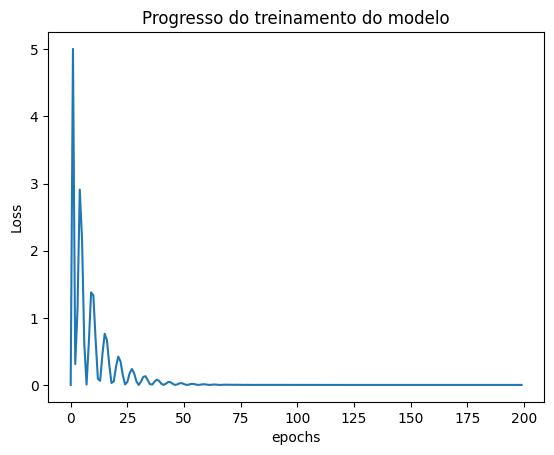

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso do treinamento do modelo')
plt.xlabel('epochs')
plt.ylabel('Loss');


In [48]:
# Verificando se foi achado a fórmula
peso1, peso2 = model.get_weights()
x = peso1[0][0]
w = peso2[0]
print('F = C *', x ,'+', w)

F = C * 1.8 + 32.0


In [52]:
def c_to_f_formula(c):
    return (c *  1.8 + 32)

In [56]:
# Validando o modelo comparando a conversão através do modelo com a conversão através da fórmula
temp_c = 10
temp_f = model.predict([temp_c])
print('Temperatura em F pelo modelo:', temp_f[0][0])
print('Temperatura em F pela fórmuala:', c_to_f_formula(temp_c))


1/1 [==============================] - 0s 22ms/step
Temperatura em F pelo modelo: 50.0
Temperatura em F pela fórmuala: 50.0
